#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt
%matplotlib inline

# Normalization and Confidence Intervals (CI)
## Normalization
* Min-Max
* Z-score

## Confidence Intervals
* Interpretation
* Definition
* Examples

## Normalization
### Min-Max
\begin{equation} x' = \frac{x - min}{max - min} \end{equation}

\begin{equation} X' = \frac{X - X_{min}}{X_{max} - X_{min}} \end{equation}

Special cases:
- if $X = X_{min}$
\begin{equation} X' = \frac{X - X_{min}}{X_{max} - X_{min}} = \frac{X_{min} - X_{min}}{X_{max} - X_{min}} = \frac{0}{X_{max} - X_{min}} = 0 \end{equation}
- if $X = X_{max}$
\begin{equation} X' = \frac{X - X_{min}}{X_{max} - X_{min}} = \frac{X_{max} - X_{min}}{X_{max} - X_{min}} = 1 \end{equation}
- if $X = \frac{X_{max} + X_{min}}{2}$
\begin{equation} X' = \frac{X - X_{min}}{X_{max} - X_{min}} = \frac{\frac{X_{max} + X_{min}}{2} - X_{min}}{X_{max} - X_{min}} = \frac{\frac{X_{max} + X_{min}}{2} - 2 * \frac{X_{min}}{2} }{X_{max} - X_{min}} = \frac{\frac{X_{max} - X_{min}}{2} }{X_{max} - X_{min}} = \frac{1}{2} \end{equation}

#### Min-Max proejction to [0,1]:

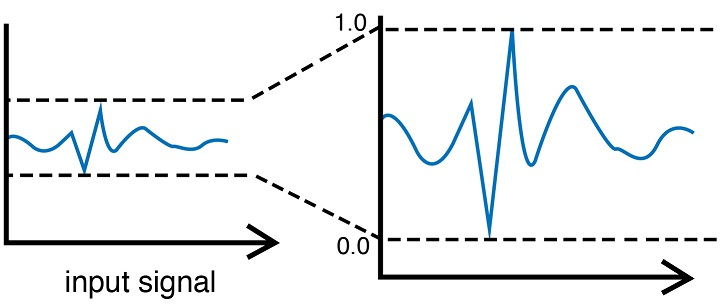

### Z-score or standard score
\begin{equation} x' = \frac{x - mean}{stdev} \end{equation}

\begin{equation} X' = \frac{X - \mu}{\sigma} \end{equation}

Special cases:
- if $X = \mu$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu - \mu}{\sigma} = = \frac{0}{\sigma} = 0 \end{equation}
- if $X = \mu + \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu + \sigma - \mu}{\sigma} = \frac{\sigma}{\sigma} = 1 \end{equation}
- if $X = \mu - \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu - \sigma - \mu}{\sigma} = \frac{-\sigma}{\sigma} = -1 \end{equation}

- if $X = \mu + 2 \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu + 2 \sigma - \mu}{\sigma} = \frac{2 \sigma}{\sigma} = 2 \end{equation}
- if $X = \mu - 2 \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu - 2 \sigma - \mu}{\sigma} = \frac{-2 \sigma}{\sigma} = -2 \end{equation}
...
<br><br>
- if $X = \mu + k \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu + k \sigma - \mu}{\sigma} = \frac{k \sigma}{\sigma} = k \end{equation}
- if $X = \mu - k \sigma$
\begin{equation} X' = \frac{X - \mu}{\sigma} = \frac{\mu - k \sigma - \mu}{\sigma} = \frac{-k \sigma}{\sigma} = -k \end{equation}

#### Z-score proejction to normal distribution (with 0 mean and 1 standard deviation):

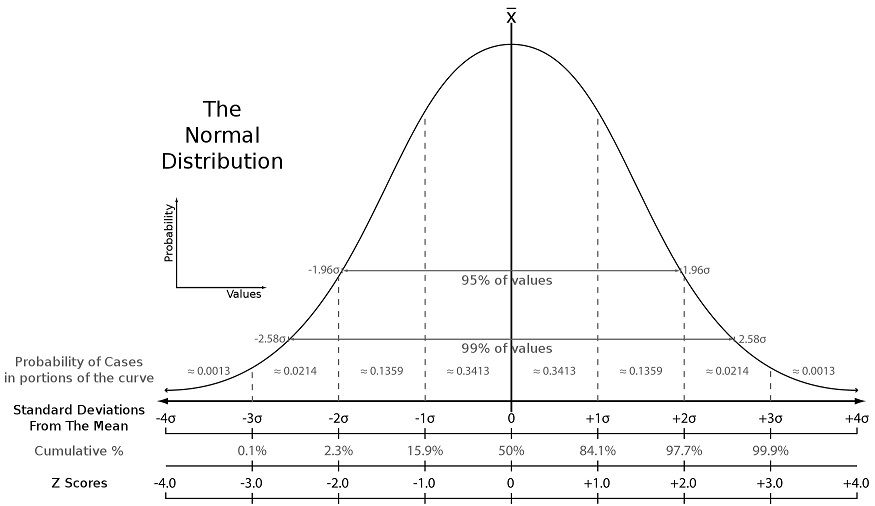
Source: wikipedia

Z-score table and Z-score calculator: https://www.calculator.net/z-score-calculator.html

### Confidence Intervals

**Interpretation:** a normal random variable (or a random variable which resembels normal distribution)<br>
The probability of the outcomes is within
- 1 standard deviation from the mean is $\approx$ 0.6826
- 2 standard deviation from the mean is $\approx$ 0.9544
- 3 standard deviation from the mean is $\approx$ 0.9974
    


**Definition:** 95% and 99% confidence intervals<br>
* The 95% confidence interval for a normal random variable with mean µ and standard deviation σ is the interval [µ − 2σ, µ + 2σ].
* The 99% confidence interval for a normal random variable with mean µ and standard deviation σ is the interval [µ − 3σ, µ + 3σ].

When sampling a normal random variable, the outcomes fall in the<br>
* 95% confidence interval 95% of the time (we are 95% confident that the outcome falls in this interval)
* 99% confidence interval 99% of the time (we are 99% confident that the outcome falls in this interval)

We can use the cumulative distribution function (norm.cdf in scipy.stats) to calculate such intervals for normal distribution:


In [2]:
ss.norm.cdf(2, 0, 1) - ss.norm.cdf(-2, 0, 1)

0.9544997361036416

In [3]:
ss.norm.cdf(1.96, 0, 1) - ss.norm.cdf(-1.96, 0, 1)

0.950004209703559

In [4]:
ss.norm.cdf(3, 0, 1) - ss.norm.cdf(-3, 0, 1)

0.9973002039367398

In [5]:
ss.norm.cdf(2.576, 0, 1) - ss.norm.cdf(-2.576, 0, 1)

0.9900049353685301

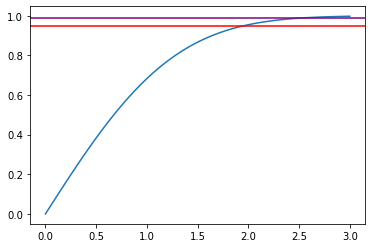

In [6]:
x = np.linspace(0, 3, 100)
y = ss.norm.cdf(x, 0, 1) - ss.norm.cdf(-x, 0, 1)
plt.plot(x, y)
plt.axhline(y = 0.95, color='red')
plt.axhline(y = 0.99, color='purple')
plt.show()

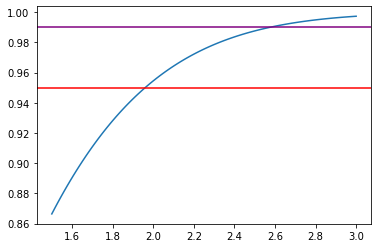

In [7]:
x = np.linspace(1.5, 3, 100)
y = ss.norm.cdf(x, 0, 1) - ss.norm.cdf(-x, 0, 1)
plt.plot(x, y)
plt.axhline(y = 0.95, color='red')
plt.axhline(y = 0.99, color='purple')
plt.show()

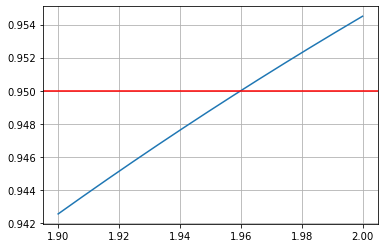

In [8]:
x = np.linspace(1.9, 2, 1000)
y = ss.norm.cdf(x, 0, 1) - ss.norm.cdf(-x, 0, 1)
plt.plot(x, y)
plt.axhline(y = 0.95, color='red')
#plt.axhline(y = 0.99, color='purple')
plt.grid()
plt.show()

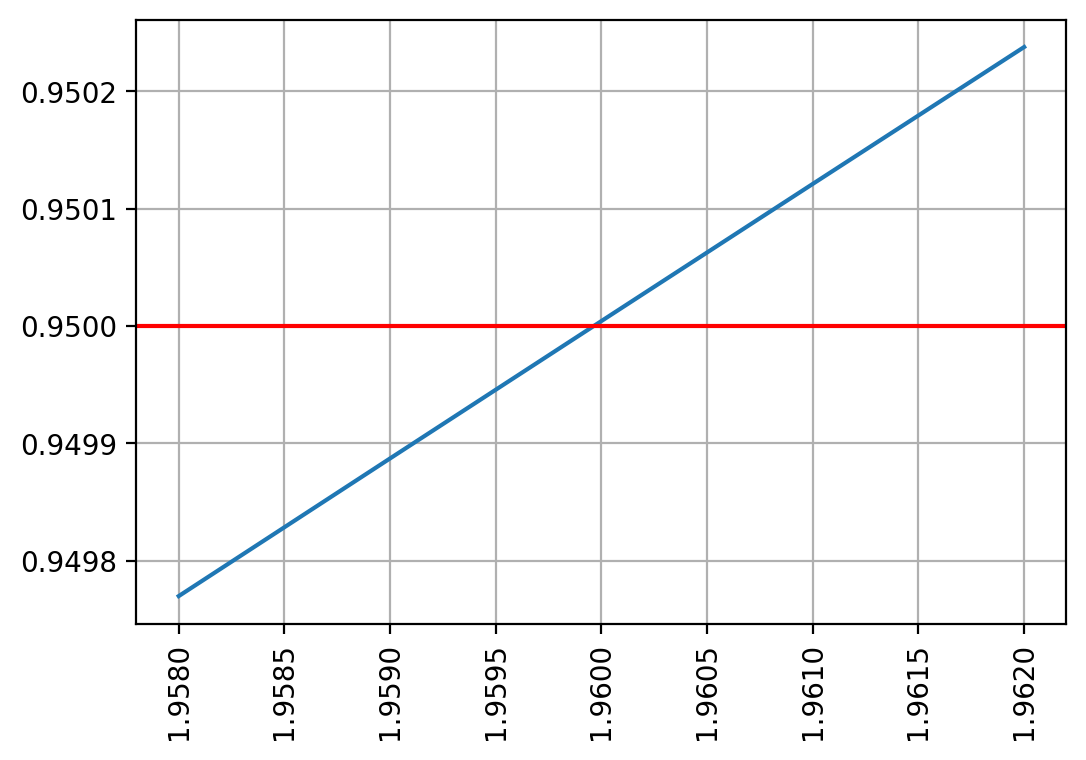

In [9]:
plt.figure(dpi=200)
x = np.linspace(1.958, 1.962, 1000)
y = ss.norm.cdf(x, 0, 1) - ss.norm.cdf(-x, 0, 1)
plt.plot(x, y)
plt.axhline(y = 0.95, color='red')
#plt.axhline(y = 0.99, color='purple')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

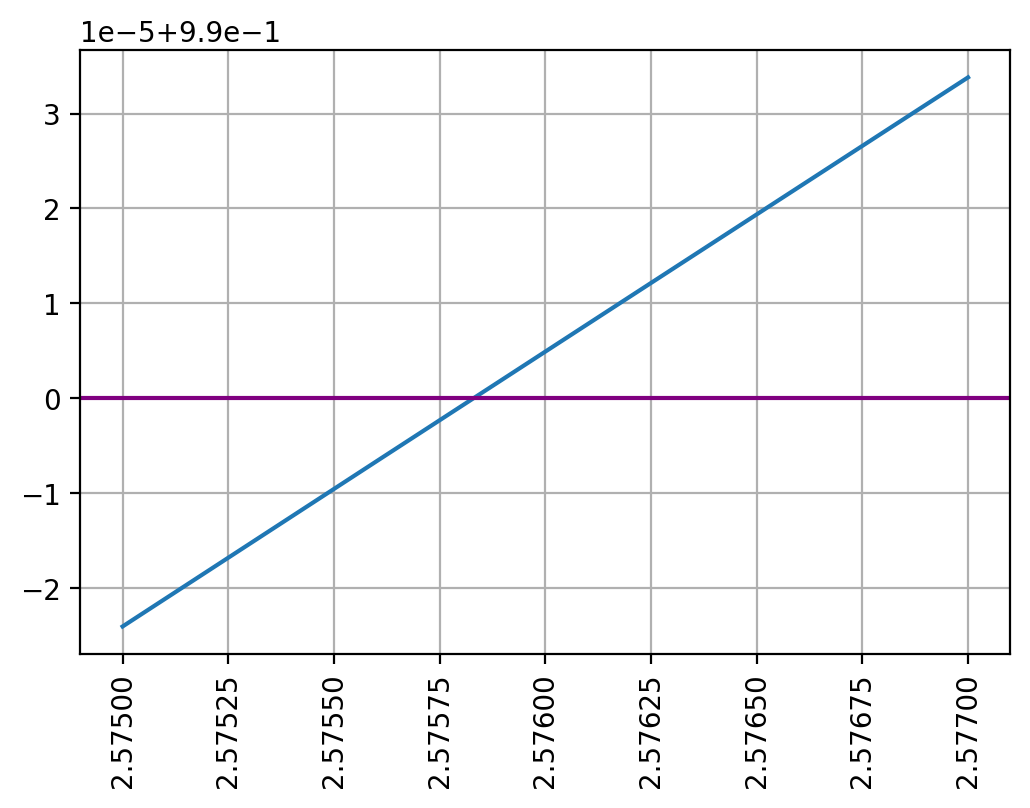

In [10]:
plt.figure(dpi=200)
x = np.linspace(2.575, 2.577, 1000)
y = ss.norm.cdf(x, 0, 1) - ss.norm.cdf(-x, 0, 1)
plt.plot(x, y)
#plt.axhline(y = 0.95, color='red')
plt.axhline(y = 0.99, color='purple')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

#### Example
Coin flip 100 times, then count the number of heads (assume a fair coin):

In [11]:
sum(np.random.choice([0,1],100))

49

This was one experiment and the result is expected around 50 (about half the coins will show head)

How could we say that we are confident that the number of heads will fall into an interval (around 50)?

When can we say that we are 95% confident falling into an interval? If the experiment shows falling into the interval at least 95% of the time? 

What is the 95% confidence interval for the number of heads in 100 flips of a fair coin?

Lets simulate many of these 100 coin flips:
- use random 0s and 1s
- assume 1 for heads
- assume 0 for tail
- run experiment 10 ** 5 times
- notice the symmetry
    - 0 and 1 are interchangeable
    - middle of such interval should be around 50
- count the number of experiments when it falls below of a set threshold
    - when lower than the set lower threshold
    - when higher than the set higher threshold
- try to find such threshold(s) for 95% of the cases (falling between them)
    - we can count only the ones falling under the threshold due to symmetry and the property of complementer sets

In [12]:
l = []
for i in range(10**5):
    l.append(sum(np.random.choice([0,1],100)))

print('The average number of heads:', np.mean(l))
print('The least number of heads among the experiments:', min(l))
print('The most number of heads among the experiments:', max(l))

The average number of heads: 49.98919
The least number of heads among the experiments: 26
The most number of heads among the experiments: 71


Display histogram of the outcomes:

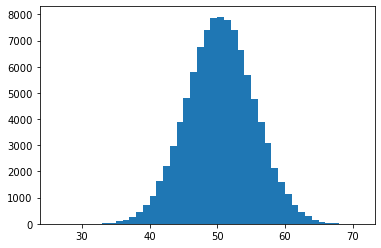

In [13]:
plt.hist(l, bins=45)
plt.show()

The histogram resembles normal distribution.

Now lets count how many times we get under a set treshold.

For example we expect to have 0-50 heads around 50% of the times (just as 51-100 heads around half the times):

In [14]:
sum(np.random.choice([0,1],100))

50

In [15]:
# a quick check for the average value produced by the experiments
sum(np.random.choice([0,1],10 ** 5))/10 ** 5

0.49842

In [16]:
# number of coin flips
n = 10 ** 5
# set a counter
c = 0
# set a t threshold
t = 50
# loop for the number of experiments
for i in range(n):
    # store the number of heads in s
    s = sum(np.random.choice([0,1],101))
    # we count the experiment if it is less than or equal to the set treshold
    if s <= t:
        # increase the number of cases to count, when the number of heads are less than the threshold
        c = c + 1
#print(c, n)
# calculate the probability
print(c / n)

0.50184


This is as per expectations, half the times we counted + 1

Now lets find the threshold which yields 95%. Due to the symmetry, we'd need to find 2.5% cases falling below a set threshold.<br>
Lets try threshold $t = 40$ first:

In [17]:
n = 10 ** 5
c = 0
t = 40
for i in range(n):
    s = sum(np.random.choice([0,1],100))
    if s <= t:
        c = c + 1
print(c / n)

0.02862


In [18]:
def findt(t):
    n = 10 ** 5
    c = 0

    for i in range(n):
        s = sum(np.random.choice([0,1],100))
        if s <= t:
            c = c + 1
    return c / n

In [19]:
for i in range(38, 42):
    print(i, ':', findt(i))

38 : 0.01054
39 : 0.01818
40 : 0.0282
41 : 0.04549


Therefore we can say that: 95% of the time the number of heads will be between 40 to 60 by flipping a coin 100 times.

#### Example
Predict who wins the election

**Assumptions:**
- There are only Democrats and Republicans
- Interview a number of voters (1296)
- Count how many votes are for democrats / republicans
- proportion of democrat / republican votes are *p* and *1 - p*

**Question:**
- What is the 99% confidence interval for the outcome of the election?

**Answer** (calculated):
Observed: \begin{equation} \hat{X} = \frac{X_1 + X_2 + ... + X_{1296}}{1296} \end{equation}

The variance: \begin{equation} Var(\hat{X}) = \frac{p (1-p) }{1296} \end{equation}

The standard deviation: \begin{equation} Std(\hat{X}) = \sqrt { \frac{p (1-p) }{1296} } = \frac{ \sqrt{p (1-p)} }{36} \end{equation}

The 99% confidence interval: \begin{equation} [ p - \frac{ \sqrt{p (1-p)} }{12}, p + \frac{ \sqrt{p (1-p)} }{12} ] \end{equation}

If p = 1 / 2: \begin{equation} [ \frac{1}{2} - \frac{1}{24}, \frac{1}{2} + \frac{1}{24} ] = [ \frac{11}{24}, \frac{13}{24} ] \end{equation}

\begin{equation} which \ is \ [ \frac{11}{24}, \frac{13}{24} ] \end{equation}

If p = 0.8: \begin{equation} [ 0.8 - \frac{ \sqrt{0.8 * 0.2} }{12}, 0.8 + \frac{ \sqrt{0.8 * 0.2} }{12} ] \end{equation}

\begin{equation} which \ is \ [ \frac{23}{30}, \frac{25}{30} ] \end{equation}


Lets simulate the same, use p = 80%

Notes 
- knowing the theoretic confidence interval, we expect the lower threshold being around $1296 * \frac{23}{30} \approx 994$
- the average number of democratic votes is around $1296 * 0.8 \approx 1037$

In [20]:
np.random.choice(2, 1296, p=[0.2, 0.8])

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
np.arange(2)

array([0, 1])

In [22]:
sum(np.random.choice(2, 1296, p=[0.2, 0.8]))

1033

Lets run more experiments, simulate asking 1296 voters 10 ** 5 times:

In [ ]:
l = []
for i in range(10**4):
    l.append(sum(np.random.choice(2, 1296, p=[0.2, 0.8])))

plt.hist(l, 50)
plt.show()

Notice that it approximates to normal distribution

Now lets set a lower threshold and calculate how many times we will fall less than that:

In [ ]:
c = 0
n = 10 ** 5
t = 999   # The average is 0.8 * 1296 = 1036.2
for i in range(n):
    s = sum(np.random.choice(2, 1296, p=[0.2, 0.8]))
    if s <= t:
        c = c + 1
print(c / n)

We are looking for a result around 0.005 since $\frac{1 - 99\%}{2} = 0.005$

In [ ]:
c = 0
n = 10 ** 5
t = 1010   # 0.8 * 1296 = 1036.2
for i in range(n):
    s = sum(np.random.choice(2, 1296, p=[0.2, 0.8]))
    if s <= t:
        c = c + 1
print(c / n, "this is a bit high compared to 0.005")

In [ ]:
c = 0
n = 10 ** 5
t = 999   # 0.8 * 1296 = 1036.2
for i in range(n):
    s = sum(np.random.choice(2, 1296, p=[0.2, 0.8]))
    if s <= t:
        c = c + 1
print(c / n, "just about right!")

Just in case lets calculate the upper threshold, expected around 1080 $\ \ \ \ 1037 + (1037 - 994) = 1037 + 43 = 1080$

In [ ]:
c = 0
n = 10 ** 5
t = 1080
for i in range(n):
    s = sum(np.random.choice(2, 1296, p=[0.2, 0.8]))
    if s >= t:
        c = c + 1
print(c / n, "this is too low compared to 0.005")

In [ ]:
c = 0
n = 10 ** 5
t = 1083   # 0.8 * 1296 = 1036.2
for i in range(n):
    s = sum(np.random.choice(2, 1296, p=[0.2, 0.8]))
    if s >= t:
        c = c + 1
print(c / n, "just about right!")

Our finding is that 99% of the votes fall between 999 and 1083

We are 99% confident that the number of votes are between 999 and 1083

#### Homework 21.1:
Calculate confidence interval
- What is the 99% confidence interval for the number of heads in 100 flips of a fair coin?


In [ ]:
# Homework 21.1 code comes here:



#### Homework 21.2:
Identify the confidence interval
- What is the 99% confidence interval for the outcome of the election?
- Interview 1296 voters
- Assume 0.6 : 0.4 proportions for democrats / republicans

In [ ]:
# Homework 21.2 code comes here:

